In [66]:
from bs4 import BeautifulSoup
import requests



In [67]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [68]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feat

In [69]:
table = soup.find_all('table')[0]

In [70]:
print(table)

<table class="wikitable sortable" style="text-align:left;">
<tbody><tr>
<th rowspan="2" scope="col">Rank
</th>
<th rowspan="2" scope="col">Name
</th>
<th rowspan="2" scope="col">Industry
</th>
<th scope="col">Revenue
</th>
<th scope="col">Profit
</th>
<th rowspan="2" scope="col">Employees
</th>
<th rowspan="2" scope="col">Headquarters<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[note 1]</a></sup>
</th>
<th rowspan="2" scope="col"><a href="/wiki/State-owned_enterprise" title="State-owned enterprise">State-owned</a>
</th>
<th class="unsortable" rowspan="2" scope="col"><abbr title="Reference(s)">Ref.</abbr>
</th></tr>
<tr>
<th colspan="2" scope="col"><small>USD millions</small>
</th></tr>
<tr>
<th scope="column">1
</th>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a></td>
<td><a href="/wiki/Retail" title="Retail">Retail</a></td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height

In [71]:
world_titles = table.find_all('th')

In [72]:
world_titles

[<th rowspan="2" scope="col">Rank
 </th>,
 <th rowspan="2" scope="col">Name
 </th>,
 <th rowspan="2" scope="col">Industry
 </th>,
 <th scope="col">Revenue
 </th>,
 <th scope="col">Profit
 </th>,
 <th rowspan="2" scope="col">Employees
 </th>,
 <th rowspan="2" scope="col">Headquarters<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[note 1]</a></sup>
 </th>,
 <th rowspan="2" scope="col"><a href="/wiki/State-owned_enterprise" title="State-owned enterprise">State-owned</a>
 </th>,
 <th class="unsortable" rowspan="2" scope="col"><abbr title="Reference(s)">Ref.</abbr>
 </th>,
 <th colspan="2" scope="col"><small>USD millions</small>
 </th>,
 <th scope="column">1
 </th>,
 <th scope="row">2
 </th>,
 <th scope="row">3
 </th>,
 <th scope="row">4
 </th>,
 <th scope="row">5
 </th>,
 <th scope="row">6
 </th>,
 <th scope="row">7
 </th>,
 <th scope="row">8
 </th>,
 <th scope="row">9
 </th>,
 <th scope="row">10
 </th>,
 <th scope="row">11
 </th>,
 <th scope="row">12
 </th>,
 <th scope="row

In [73]:
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue', 'Profit', 'Employees', 'Headquarters[note 1]', 'State-owned', 'Ref.', 'USD millions', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']


In [74]:
import pandas as pd

In [75]:
df = pd.DataFrame(columns = world_table_titles)

selected_columns = ['Name','Industry', 'Revenue', 'Profit', 'Employees', 'Headquarters[note 1]', 'State-owned', 'Ref.']
subset_df = df[selected_columns]

subset_df


,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned,Ref.


In [76]:
column_Data = table.find_all('tr')


In [77]:
for row in column_Data[2:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
  
    length = len(subset_df)
    subset_df.loc[length] = individual_row_data
   

C:\Users\Don\AppData\Local\Temp\ipykernel_8328\1480303542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[length] = individual_row_data
C:\Users\Don\AppData\Local\Temp\ipykernel_8328\1480303542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[length] = individual_row_data
C:\Users\Don\AppData\Local\Temp\ipykernel_8328\1480303542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[length]

In [78]:
subset_df

,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned,Ref.
0,Walmart,Retail,"$611,289","$11,680","2,100,000",United States,,[1]
1,Saudi Aramco,Oil and gas,"$603,651","$159,069","70,496",Saudi Arabia,,[4]
2,State Grid Corporation of China,Electricity,"$530,009","$8,192","870,287",China,,[5]
3,Amazon,Retail,"$513,983","−$2,722","1,541,000",United States,,[6]
4,Vitol,Commodities,"$505,000","$15,000","1,560",Switzerland,,[7][8]
5,China National Petroleum Corporation,Oil and gas,"$483,019","$21,080","1,087,049",China,,[9]
6,China Petrochemical Corporation,Oil and gas,"$471,154","$9,657","527,487",China,,[10]
7,ExxonMobil,Oil and gas,"$413,680","$55,740","63,000",United States,,[11]
8,Apple,Electronics,"$394,328","$99,803","164,000",United States,,[12]
9,Shell,Oil and gas,"$386,201","$20,120","93,000",United Kingdom,,[13]


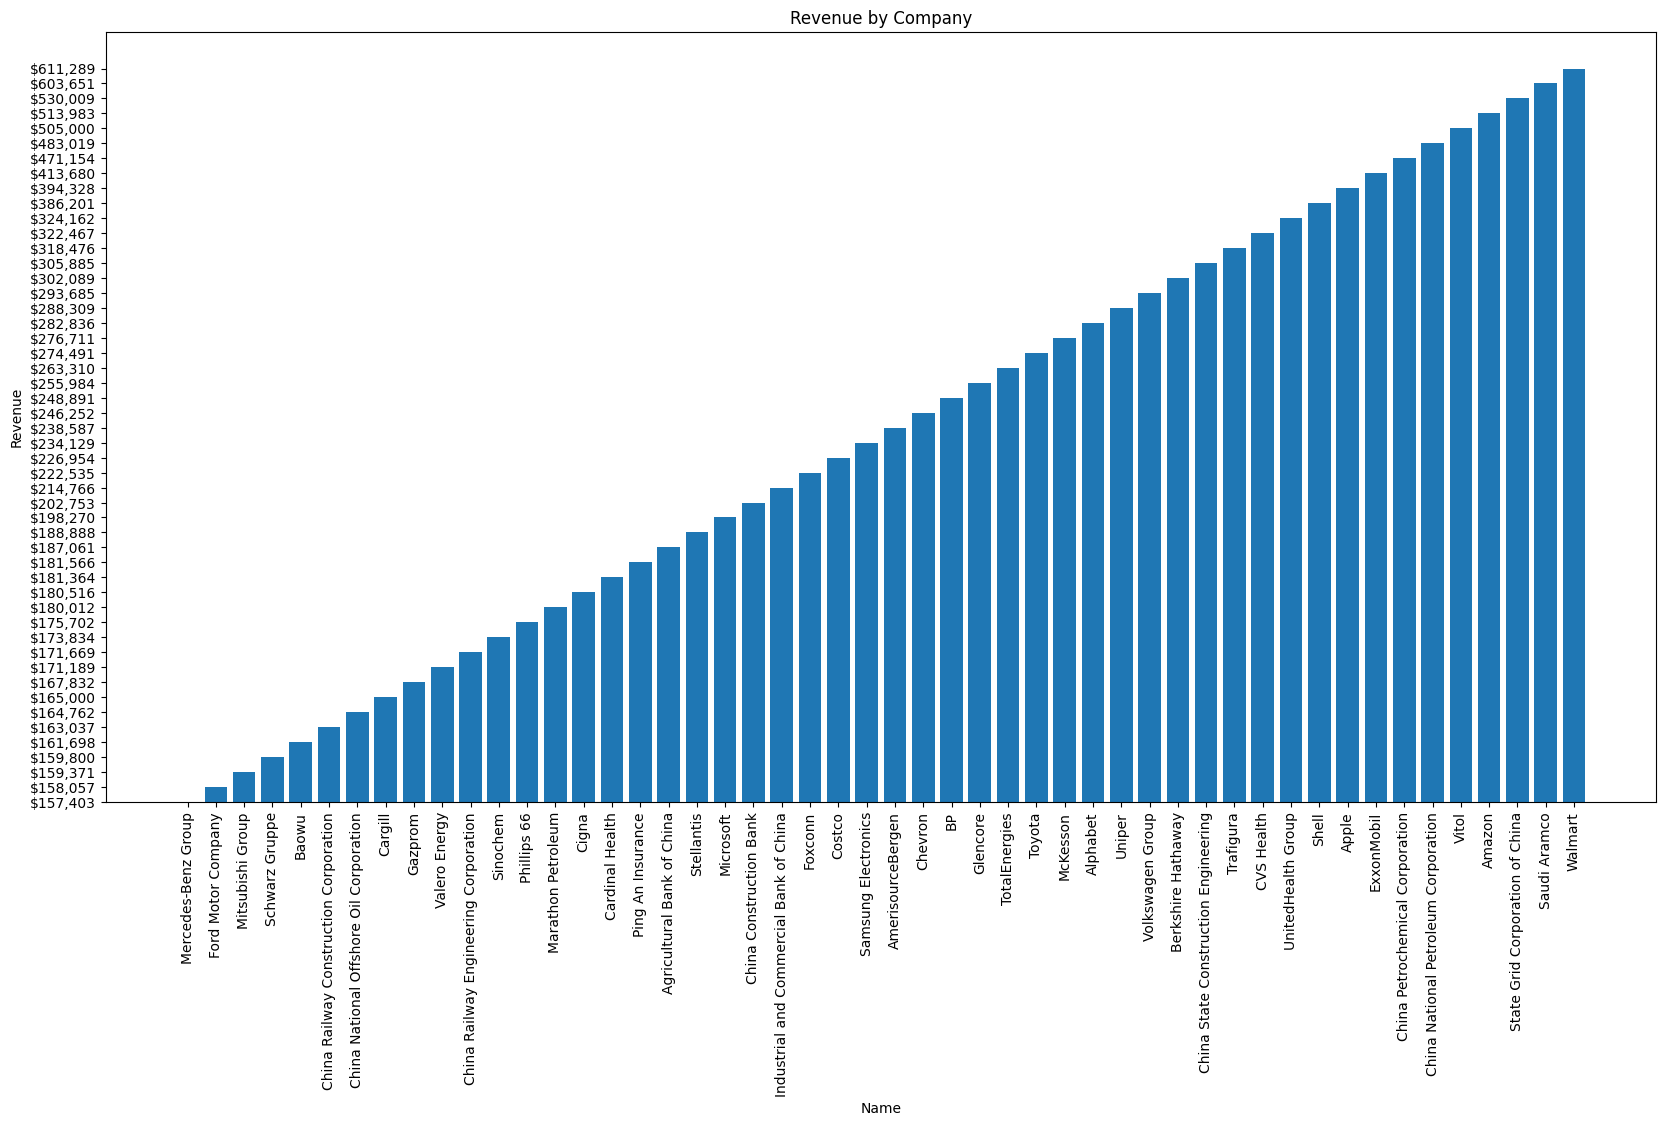

In [83]:
import matplotlib.pyplot as plt

subset_df = subset_df.sort_values(by='Revenue', ascending=True)

plt.figure(figsize=(20, 10))
plt.bar(subset_df['Name'], subset_df['Revenue']) 

plt.xlabel('Name')
plt.ylabel('Revenue')
plt.title('Revenue by Company')

plt.xticks(rotation=90)

plt.show()